In [101]:
import pandas as pd
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np

Dubai / 동 / 선박운임료 / 석탄의 경우 Bloomberg Terminal 활용하여 확보
코로나 관련 데이터는 깃허브의 csv파일로 확보
S&P Energy 가격은 Investing.com을 통해 csv파일로 확보하였다.
그 외의 데이터는 Pandas_datareader 와 FinanceDataReader를 통해 확보하였다.

# 데이터 합치기 및 확인(+EDA)

데이터 별 특징 정리:

2020년 코로나 데이터를 포함하는 데이터 = 코로나 / 비트코인

In [102]:
#데이터 불러오기
df_2008 = pd.read_csv('data/df_2008.csv')
df_2008.Date = pd.to_datetime(df_2008.Date)
df_2008

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,Dollar,Snp,Open,High,Low,Volume,Energy
0,2008-02-01,89.03,91.41,7.740,933.00,7230.0,6134.0,75.565,1395.42,537.15,544.62,534.29,238.36M,540.81
1,2008-02-04,90.07,91.09,7.869,899.50,7260.0,6121.0,75.470,1380.82,540.81,544.41,535.15,188.02M,541.30
2,2008-02-05,88.32,89.60,7.942,889.75,7130.0,6032.0,76.285,1336.64,541.29,541.29,521.00,243.54M,521.00
3,2008-02-06,87.16,88.73,7.994,892.00,7330.0,6002.0,76.300,1326.45,520.99,527.14,511.26,243.06M,512.79
4,2008-02-07,88.07,88.55,8.102,908.25,7540.0,6135.0,77.120,1336.91,512.10,523.59,507.85,234.50M,518.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,93.961,4438.23,427.19,433.94,427.19,167.51M,432.43
3339,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,93.938,4471.37,432.43,438.73,432.43,173.94M,434.44
3340,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,93.945,4486.48,434.44,441.08,432.57,217.66M,434.89
3341,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,93.728,4519.63,434.89,441.40,434.47,175.70M,439.87


## EDA 및 시각화

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# 시각화를 위해 관련 요소들만 추출
df_hm=df_2008.drop(['Open','High', 'Low'],axis=1)
df_hm.head()
df_hm_corr = df_hm.corr()
df_hm_corr

,WTI,Brent,Gas,Gold,Copper,Bdiy,Dollar,Snp,Energy
WTI,1.000000,0.971166,0.604269,-0.029669,0.657168,0.467595,-0.830272,-0.440995,0.630012
Brent,0.971166,1.000000,0.478414,0.101399,0.687422,0.335875,-0.801057,-0.418905,0.639576
Gas,0.604269,0.478414,1.000000,-0.466221,0.267487,0.839320,-0.604868,-0.392266,0.281012
Gold,-0.029669,0.101399,-0.466221,1.000000,0.497036,-0.302230,0.108119,0.521617,-0.250568
Copper,0.657168,0.687422,0.267487,0.497036,1.000000,0.336815,-0.534131,0.092887,0.222676
Bdiy,0.467595,0.335875,0.839320,-0.302230,0.336815,1.000000,-0.457353,-0.146624,0.034603
Dollar,-0.830272,-0.801057,-0.604868,0.108119,-0.534131,-0.457353,1.000000,0.674689,-0.327604
Snp,-0.440995,-0.418905,-0.392266,0.521617,0.092887,-0.146624,0.674689,1.000000,-0.299881
Energy,0.630012,0.639576,0.281012,-0.250568,0.222676,0.034603,-0.327604,-0.299881,1.000000


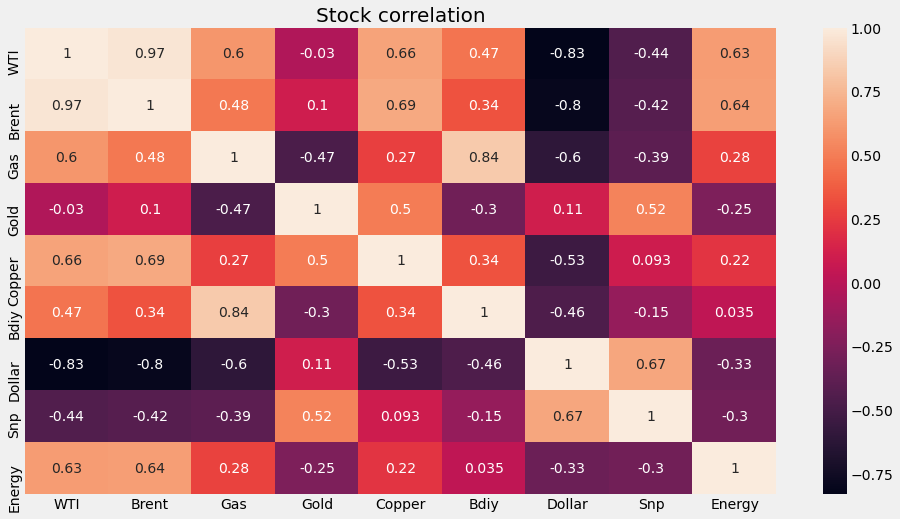

In [105]:
# 상관관계 히트맵
plt.figure(figsize = (15,8))
sns.heatmap(df_hm_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

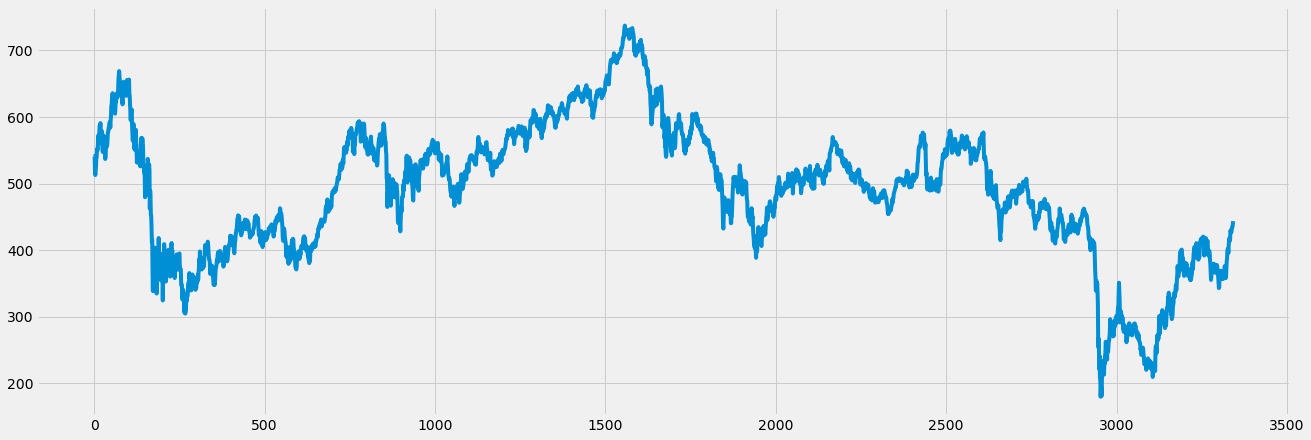

In [106]:
# Energy 선 그래프

plt.figure(figsize=(20,7))
plt.plot(df_hm.index, df_hm.Energy)
plt.show()

In [107]:
# 선그래프
X= df_hm.index
y1= df_hm.WTI
y2= df_hm.Brent
y3= df_hm.Gas
y4= df_hm.Gold
y5= df_hm.Copper
y6= df_hm.Bdiy
y7= df_hm.Dollar
y8= df_hm.Snp
#y9= df_hm.Volume
y10= df_hm.Energy

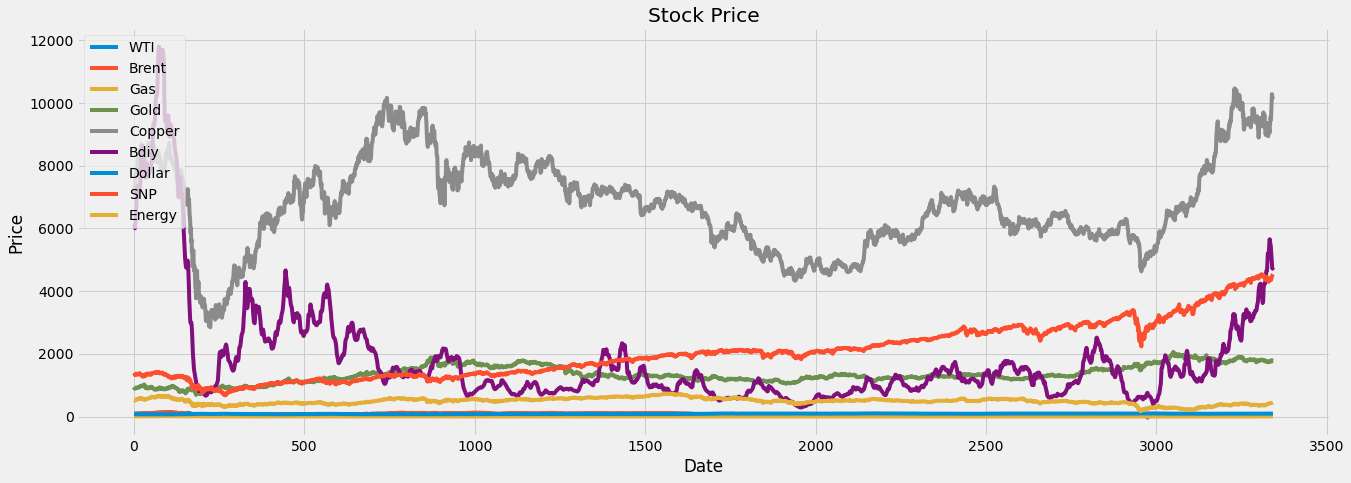

In [108]:
plt.figure(figsize=(20,7))
plt.plot(X, y1, label = 'WTI')
plt.plot(X, y2, label = 'Brent')
plt.plot(X, y3, label = 'Gas')
plt.plot(X, y4, label = 'Gold')
plt.plot(X, y5, label = 'Copper')
plt.plot(X, y6, label = 'Bdiy')
plt.plot(X, y7, label = 'Dollar')
plt.plot(X, y8, label = 'SNP')
plt.plot(X, y10, label = 'Energy')

plt.legend(loc='upper left')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [109]:
X = df_hm.iloc[:,1:-2]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2008['Energy']

In [110]:
## OLS 회귀 분석 (변수간의 관계식 파악을 위함)
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Energy   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.153e+04
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:37:40   Log-Likelihood:                         -17814.
No. Observations:                3343   AIC:                                  3.564e+04
Df Residuals:                    3335   BIC:                                  3.569e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WTI            0.5366      0.217      2.475      0.013       0.111       0.962
Brent          4.1301      0.189     21.893      0.000       3.760       4.500
Gas            4.9295      1.148      4.293      0.000       2.678       7.181
Gold          -0.2326      0.006    -40.654      0.000      -0.244      -0.221
Copper         0.0005      0.001      0.413      0.679      -0.002       0.003
Bdiy          -0.0259      0.001    -24.722      0.000      -0.028      -0.024
Dollar         4.7623      0.065     72.747      0.000       4.634       4.891
Snp            0.0281      0.002     17.771      0.000       0.025       0.031
==============================================================================
Omnibus:                       52.260   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.619
Skew:                          -0.139   Prob(JB):                     6.96e-19
Kurtosis:                       3.723   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Selection
- 과도한 상관관계 / 또는 높은 설명력을 가진 변수의 경우 제외하기로 결정하였다
    Crewd Oil 값은 제거하여 돌려보기로 하였다.
- Copper의 경우 회귀분석에 있어서 너무 높은 pvalue를 보여 우선적으로 탈락
- Open,High,Low의 경우 초기에는 탈락시키고 분석을 하려는 시도를 했으나 너무나도 정확도가 낮아 포함하는 방향으로 전환 (분석에 있어서 가장 중요한 요소이기도 하다)

In [111]:
X1 = df_2008.drop(['Date','Brent','Copper','Volume','Energy'],axis =1)
y1 = df_2008['Energy']
# feature selection
df_2008 = df_2008.drop(['Brent','Copper','Volume'],axis =1)


## Train/Test Split

In [112]:
# 아래 방법 또는 4년/1년으로 (마지막에는 5/1년) 나누는 코드 작성 필요

In [113]:
train1 = df_2008.loc[(df_2008.Date <= '2011-12-31'),:]
test1 = df_2008.loc[(df_2008.Date >= '2012-01-01')&(df_2008.Date <= '2012-12-31'),:]
train2 = df_2008.loc[(df_2008.Date >= '2013-01-01')&(df_2008.Date <= '2016-12-31'),:]
#train2 = df_2008.loc[(df_2008.Date <= '2016-12-31'),:]

test2 = df_2008.loc[(df_2008.Date >= '2017-01-01')&(df_2008.Date <= '2017-12-31'),:]
#train3 = df_2008.loc[(df_2008.Date >= '2018-01-01')&(df_2008.Date <= '2020-12-31'),:]
train3 = df_2008.loc[(df_2008.Date <= '2020-12-31'),:]
test3 = df_2008.loc[df_2008.Date >= '2021-01-01',:]

In [114]:
from sklearn.model_selection import TimeSeriesSplit

X1 = np.array(X1)
y1 = np.array(y1)

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=0,
    max_train_size=1500,
    test_size=100,
)
all_splits = list(ts_cv.split(X1, y1))
train_0, test_0 = all_splits[0]
train_1, test_1 = all_splits[1]
train_2, test_2 = all_splits[2]
train_3, test_3 = all_splits[3]
train_4, test_4 = all_splits[4]

In [115]:
# 데이터 분리 시각화
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

cmap_data = plt.cm.Paired 
cmap_cv = plt.cm.coolwarm 
plt.style.use('fivethirtyeight')

def plot_cv_indices(cv, X, n_splits, lw=10): 
  fig, ax = plt.subplots() 
  """Create a sample plot for indices of a cross-validation object.""" 
  
  # Generate the training/testing visualizations for each CV split 
  for ii, (tr, tt) in enumerate(cv.split(X=X)): 
    # Fill in indices with the training/test groups 
    indices = np.array([np.nan] * len(X)) 
    indices[tt] = 1 
    indices[tr] = 0 
    
    # Visualize the results 
    ax.scatter(range(len(indices)), [ii + .5] * len(indices),
               c=indices, marker='_', lw=lw, cmap=cmap_cv, 
               vmin=-.2, vmax=1.2) 
    # Formatting 
    yticklabels = list(range(n_splits)) 
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels, 
           xlabel='Sample index', ylabel="CV iteration", 
           ylim=[n_splits+0.1, -.1], xlim=[0, len(X)]) 
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15) 
    
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))], 
              ['Testing set', 'Training set'], loc=(1.02, .8))


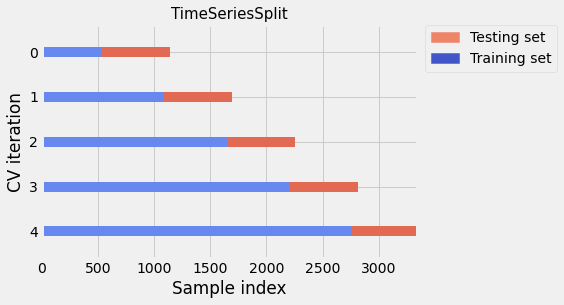

In [116]:
n_split= 5
tscv= TimeSeriesSplit(n_splits=n_split)
plot_cv_indices(tscv, X1, n_splits=n_split)

# LSTM

In [117]:
train1

,Date,WTI,Gas,Gold,Bdiy,Dollar,Snp,Open,High,Low,Energy
0,2008-02-01,89.03,7.740,933.00,6134.0,75.565,1395.42,537.15,544.62,534.29,540.81
1,2008-02-04,90.07,7.869,899.50,6121.0,75.470,1380.82,540.81,544.41,535.15,541.30
2,2008-02-05,88.32,7.942,889.75,6032.0,76.285,1336.64,541.29,541.29,521.00,521.00
3,2008-02-06,87.16,7.994,892.00,6002.0,76.300,1326.45,520.99,527.14,511.26,512.79
4,2008-02-07,88.07,8.102,908.25,6135.0,77.120,1336.91,512.10,523.59,507.85,518.83
...,...,...,...,...,...,...,...,...,...,...,...
952,2011-12-19,93.86,3.096,1593.00,1885.0,80.207,1205.35,497.40,498.06,488.19,489.20
953,2011-12-20,97.16,3.128,1605.00,1878.0,80.273,1241.30,489.20,509.37,489.20,508.52
954,2011-12-21,98.54,3.155,1637.50,1856.0,80.350,1243.72,508.52,515.50,506.24,514.42
955,2011-12-22,99.42,3.169,1609.00,1787.0,80.306,1254.00,514.42,521.43,514.42,520.29


In [118]:
test3

,Date,WTI,Gas,Gold,Bdiy,Dollar,Snp,Open,High,Low,Energy
3145,2021-01-04,47.47,2.581,1930.80,1374.0,89.845,3700.65,286.14,291.67,283.30,286.50
3146,2021-01-05,49.78,2.702,1946.55,1418.0,89.409,3726.86,286.50,307.14,286.50,299.49
3147,2021-01-06,50.45,2.716,1957.20,1425.0,89.502,3748.14,299.49,311.37,299.49,308.45
3148,2021-01-07,50.63,2.729,1911.05,1448.0,89.791,3803.79,308.45,316.10,308.13,313.06
3149,2021-01-08,52.14,2.700,1891.30,1606.0,90.068,3824.68,313.06,316.90,310.37,312.78
...,...,...,...,...,...,...,...,...,...,...,...
3338,2021-10-14,81.43,5.687,1797.15,5062.0,93.961,4438.23,427.19,433.94,427.19,432.43
3339,2021-10-15,82.39,5.410,1781.45,4854.0,93.938,4471.37,432.43,438.73,432.43,434.44
3340,2021-10-18,82.62,4.989,1762.45,4732.0,93.945,4486.48,434.44,441.08,432.57,434.89
3341,2021-10-19,83.19,5.088,1779.40,4714.0,93.728,4519.63,434.89,441.40,434.47,439.87


In [119]:
# MinMax Scaler를 통한 스케일링 함수
from sklearn.preprocessing import MinMaxScaler
def Scaler(train, test):
    X = np.array(train.drop(['Date','Energy'], axis = 1))
    y = np.array(train.Energy)
    tX = np.array(test.drop(['Date','Energy'], axis = 1))
    ty = np.array(test.Energy)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    trainX = scaler.transform(X)
    testX = scaler.transform(tX)
    y = np.reshape(y ,(-1,1)) # 스케일러에 들어가려면 reshape이 필요함
    ty = np.reshape(ty, (-1,1))
    scaler = scaler.fit(y)
    trainy = scaler.transform(y)
    testy = scaler.transform(ty)
    tX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    testX = testX.reshape(testX.shape[0], testX.shape[1], 1)
    return tX, testX, trainy, testy # 이후 descale을 위해 sclaer 추출

In [120]:
fX1, fX1_test, fy1, fy1_test = Scaler(train1, test1)
fX2, fX2_test, fy2, fy2_test = Scaler(train2, test2)
fX3, fX3_test, fy3, fy3_test = Scaler(train3, test3)

In [121]:
# MinMax Scaler를 통한 스케일링 함수
from sklearn.preprocessing import MinMaxScaler
def Scaler(X,y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    trainX = scaler.transform(X)
    y = np.reshape(y ,(-1,1)) # 스케일러에 들어가려면 reshape이 필요함
    scaler = scaler.fit(y)
    trainy = scaler.transform(y)
    tX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    ty = trainy
    return tX, ty, scaler # 이후 descale을 위해 sclaer 추출

In [122]:
tX1, ty1, scaler = Scaler(X1,y1)

In [123]:
tX1[train_4].shape

(1500, 9, 1)

3개의 train 구분에 대하여 각각의 모델 적용 하는 함수를 작성해야 한다.

In [124]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN , LSTM , GRU , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#LSTM 모델 만드는 과정
def model_build(x,y):
    tf.random.set_seed(1)
    model = Sequential()
    model.add(LSTM(16, 
                   input_shape=(x,y), 
                   activation='tanh', 
                   return_sequences=True)
              )
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh'))
    model.add(Dense(1))

    model.summary()
    return model
# LSTM 모델 학습 코드(model_build포함)
def Train(xtrain,ytrain,xtest,ytest,number):
    model = model_build(xtrain.shape[1],xtrain.shape[2])
    model.compile(loss='mae' , optimizer='adam')
    earlyStopping = EarlyStopping(min_delta=0.001, monitor = 'loss', patience = 100, restore_best_weights = True)
    modelCheckPoint = ModelCheckpoint(filepath = f'best_model_{number}.h5', monitor = 'val_loss')
    
    hist = model.fit(xtrain, ytrain ,epochs=1000,validation_data=(xtest,ytest ), batch_size = 100, callbacks = [earlyStopping, modelCheckPoint] )
    
    #graph
    yhat = model.predict(xtest)
    print(f'mse evaluate : {np.average(yhat-ytest)}')
    print(yhat.shape,ytest.shape)

    plt.plot(yhat, label="LSTM")
    plt.plot(ytest, label="real")
    plt.legend()
    return yhat, ytest

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 9, 16)             1152      
_________________________________________________________________
lstm_29 (LSTM)               (None, 9, 16)             2112      
_________________________________________________________________
lstm_30 (LSTM)               (None, 9, 16)             2112      
_________________________________________________________________
lstm_31 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 4s 83ms/step - loss: 0.4023 - val_loss: 0.4941
Epoch 2/1000
10/1

10/10 [==============================] - 0s 9ms/step - loss: 0.0586 - val_loss: 0.0367
Epoch 73/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0580 - val_loss: 0.0583
Epoch 74/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0608 - val_loss: 0.0547
Epoch 75/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0577 - val_loss: 0.0374
Epoch 76/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0567 - val_loss: 0.0335
Epoch 77/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0556 - val_loss: 0.0429
Epoch 78/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0548 - val_loss: 0.0343
Epoch 79/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0542 - val_loss: 0.0555
Epoch 80/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0547 - val_loss: 0.0319
Epoch 81/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0525 - val_loss: 0.0635
Epoc

10/10 [==============================] - 0s 10ms/step - loss: 0.0129 - val_loss: 0.0182
Epoch 153/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0132 - val_loss: 0.0106
Epoch 154/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0125 - val_loss: 0.0158
Epoch 155/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0126 - val_loss: 0.0092
Epoch 156/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0124 - val_loss: 0.0097
Epoch 157/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.0082
Epoch 158/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.0096
Epoch 159/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0129 - val_loss: 0.0158
Epoch 160/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0126 - val_loss: 0.0094
Epoch 161/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0134 - val_loss: 0

10/10 [==============================] - 0s 9ms/step - loss: 0.0138 - val_loss: 0.0164
Epoch 233/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0124 - val_loss: 0.0134
Epoch 234/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0120 - val_loss: 0.0104
Epoch 235/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0123 - val_loss: 0.0077
Epoch 236/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0135 - val_loss: 0.0081
Epoch 237/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 238/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0155 - val_loss: 0.0079
Epoch 239/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0124 - val_loss: 0.0084
Epoch 240/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0142 - val_loss: 0.0079
Epoch 241/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0144 - val_loss: 0

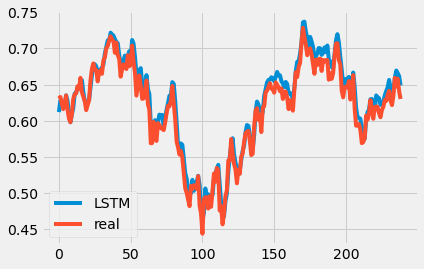

In [125]:
yhat1, ytest1 = Train(fX1, fy1, fX1_test, fy1_test,1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 9, 16)             1152      
_________________________________________________________________
lstm_33 (LSTM)               (None, 9, 16)             2112      
_________________________________________________________________
lstm_34 (LSTM)               (None, 9, 16)             2112      
_________________________________________________________________
lstm_35 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 4s 79ms/step - loss: 0.4715 - val_loss: 0.2041
Epoch 2/1000
10/1

10/10 [==============================] - 0s 9ms/step - loss: 0.0119 - val_loss: 0.0179
Epoch 73/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0120 - val_loss: 0.0159
Epoch 74/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0123 - val_loss: 0.0252
Epoch 75/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0146 - val_loss: 0.0265
Epoch 76/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0133 - val_loss: 0.0159
Epoch 77/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0121 - val_loss: 0.0146
Epoch 78/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0111 - val_loss: 0.0151
Epoch 79/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0116 - val_loss: 0.0147
Epoch 80/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 81/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0141 - val_loss: 0.0173
E

10/10 [==============================] - 0s 10ms/step - loss: 0.0092 - val_loss: 0.0284
Epoch 153/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0097 - val_loss: 0.0146
Epoch 154/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0116 - val_loss: 0.0149
Epoch 155/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0110 - val_loss: 0.0261
Epoch 156/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0107 - val_loss: 0.0267
Epoch 157/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.0105 - val_loss: 0.0294
Epoch 158/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0090 - val_loss: 0.0253
Epoch 159/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0099 - val_loss: 0.0251
Epoch 160/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0094 - val_loss: 0.0198
Epoch 161/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0092 - val_los

10/10 [==============================] - 0s 10ms/step - loss: 0.0087 - val_loss: 0.0245
Epoch 233/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0089 - val_loss: 0.0183
Epoch 234/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0091 - val_loss: 0.0247
Epoch 235/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0092 - val_loss: 0.0281
Epoch 236/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0107 - val_loss: 0.0273
Epoch 237/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0086 - val_loss: 0.0247
Epoch 238/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 0.0177
Epoch 239/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0096 - val_loss: 0.0238
Epoch 240/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0094 - val_loss: 0.0224
Epoch 241/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0085 - val_loss:

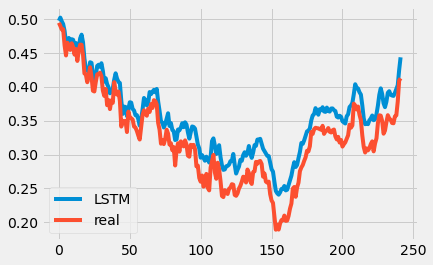

In [126]:
yhat2, ytest2 = Train(fX2, fy2, fX2_test, fy2_test,2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 9, 16)             1152      
_________________________________________________________________
lstm_37 (LSTM)               (None, 9, 16)             2112      
_________________________________________________________________
lstm_38 (LSTM)               (None, 9, 16)             2112      
_________________________________________________________________
lstm_39 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
32/32 [==============================] - 4s 28ms/step - loss: 0.3438 - val_loss: 0.3651
Epoch 2/1000
32/3

32/32 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.0090
Epoch 73/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 74/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 75/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 76/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.0068
Epoch 77/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0090
Epoch 78/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0099 - val_loss: 0.0102
Epoch 79/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0065
Epoch 80/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 81/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0065
Epoc

32/32 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0131
Epoch 153/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0079
Epoch 154/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 155/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 156/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0086
Epoch 157/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0196
Epoch 158/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0092 - val_loss: 0.0106
Epoch 159/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 160/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 161/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.

32/32 [==============================] - 0s 8ms/step - loss: 0.0071 - val_loss: 0.0091
Epoch 233/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 234/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 235/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 236/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 237/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 238/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 239/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 240/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 241/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.

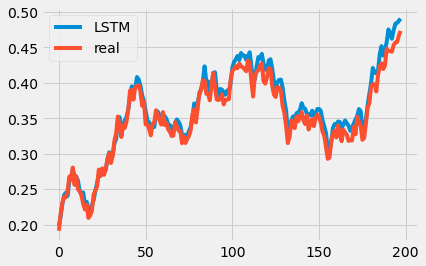

In [127]:
yhat3, ytest3 = Train(fX3, fy3, fX3_test, fy3_test,3)

# S&P500 Energy 섹터 소속 5개 회사
### 파마 프랜치 모델의 적용과 비교를 위해 주요 5개 회사를 선정, LSTM모델과의 성능 ( 수익률)차이를 계산해 보도록 하겠다

In [128]:
### ExxonMobil 불러오기

df_XOM = fdr.DataReader('XOM', '2008-01-01', '2021-10-21')
df_XOM

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,93.51,94.15,94.55,92.78,23350000.0,-0.0019
2008-01-03,93.83,93.86,94.74,93.51,19170000.0,0.0034
2008-01-04,92.08,93.24,94.36,91.88,24730000.0,-0.0187
2008-01-07,91.22,92.50,93.15,90.25,28940000.0,-0.0093
2008-01-08,90.05,91.86,92.05,89.68,21760000.0,-0.0128
...,...,...,...,...,...,...
2021-10-15,62.59,62.73,63.07,62.44,16090000.0,0.0095
2021-10-18,62.56,63.09,63.14,62.27,18270000.0,-0.0005
2021-10-19,63.50,62.87,63.61,62.67,18930000.0,0.0150


In [129]:
### Chevron Corporation 불러오기

df_CVX = fdr.DataReader('CVX', '2008-01-01', '2021-10-21')
df_CVX

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,93.46,93.96,94.69,92.71,9060000.0,0.0014
2008-01-03,94.61,93.80,94.84,93.46,10480000.0,0.0123
2008-01-04,93.35,93.88,95.21,93.20,13100000.0,-0.0133
2008-01-07,92.13,93.74,93.74,91.15,12890000.0,-0.0131
2008-01-08,90.95,92.41,93.38,90.58,10990000.0,-0.0128
...,...,...,...,...,...,...
2021-10-15,109.61,109.77,110.03,109.43,9970000.0,0.0074
2021-10-18,109.56,110.22,110.41,108.96,10500000.0,-0.0005
2021-10-19,111.70,110.16,111.70,109.79,10360000.0,0.0195


In [130]:
### ConocoPhillips 불러오기

df_COP = fdr.DataReader('COP', '2008-01-01', '2021-10-21')
df_COP

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,67.00,67.66,68.39,66.22,11500000.0,-0.0046
2008-01-03,67.27,67.09,67.88,67.09,8590000.0,0.0040
2008-01-04,65.22,66.38,66.94,65.10,11120000.0,-0.0305
2008-01-07,64.33,65.75,65.93,63.87,13550000.0,-0.0136
2008-01-08,62.90,64.68,65.26,62.72,12370000.0,-0.0222
...,...,...,...,...,...,...
2021-10-15,74.14,74.63,74.93,74.13,6950000.0,0.0039
2021-10-18,74.50,74.77,75.75,74.13,9910000.0,0.0049
2021-10-19,75.32,74.84,75.85,74.38,6590000.0,0.0110


In [131]:
### Devon Energy 불러오기

df_DVN = fdr.DataReader('DVN', '2008-01-01', '2021-10-21')
df_DVN

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,88.39,86.76,88.82,86.24,4010000.0,0.0313
2008-01-03,89.60,87.97,90.62,87.97,3340000.0,0.0137
2008-01-04,87.05,88.66,89.60,86.81,3060000.0,-0.0285
2008-01-07,86.57,87.71,87.85,85.53,3400000.0,-0.0055
2008-01-08,84.11,87.59,87.91,83.87,4150000.0,-0.0284
...,...,...,...,...,...,...
2021-10-15,40.10,40.25,40.98,40.03,7740000.0,0.0080
2021-10-18,40.52,40.67,41.98,39.88,11510000.0,0.0105
2021-10-19,40.30,40.64,41.81,40.11,16070000.0,-0.0054


In [132]:
### Marathon Oil 불러오기

df_MRO = fdr.DataReader('MRO', '2008-01-01', '2021-10-21')
df_MRO

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,37.27,37.03,37.61,37.03,5690000.0,0.0087
2008-01-03,37.56,37.47,38.38,37.03,4800000.0,0.0078
2008-01-04,36.16,37.24,37.24,36.09,5970000.0,-0.0373
2008-01-07,35.79,36.11,36.58,35.42,7500000.0,-0.0102
2008-01-08,35.56,36.38,36.78,35.43,8520000.0,-0.0064
...,...,...,...,...,...,...
2021-10-15,16.18,16.42,16.53,16.16,12690000.0,0.0025
2021-10-18,16.43,16.48,16.84,16.24,25240000.0,0.0155
2021-10-19,16.39,16.46,16.62,16.27,18510000.0,-0.0024


# 파마 프렌치 모델

In [133]:
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff
import statsmodels.api as smf

In [134]:
# ff 모델 데이터셋 호출
test_ff = ff.get_available_datasets()
df_12_industry = [test_fff for test_fff in test_ff if '12_Industry_Portfolios' in test_fff and 'Industry_Portfolios' in test_fff]
ds_industry = web.DataReader(df_12_industry[2],'famafrench', start='2008-01-01', end='2021-10-21') # 그 중 12산업 데이터셋 호출
print(ds_industry)

{0:             NoDur  Durbl  Manuf  Enrgy  Chems  BusEq  Telcm  Utils  Shops  \
Date                                                                        
2008-01-02  -1.22  -2.13  -1.76   0.50  -1.13  -1.95  -1.53  -1.10  -1.80   
2008-01-03   0.60  -0.92   0.43   0.36   0.27  -0.18  -0.13   0.19  -1.77   
2008-01-04  -1.10  -3.64  -2.96  -2.41  -1.52  -4.18  -1.99  -0.22  -2.52   
2008-01-07   1.98   0.17  -1.37  -1.00   0.12  -0.93   0.59   1.79   1.05   
2008-01-08  -0.13  -2.62  -2.42  -1.52  -1.04  -2.62  -2.65  -0.14  -1.94   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-09-24  -0.24   1.71  -0.64   0.79  -0.23   0.14  -0.22  -0.11   0.31   
2021-09-27  -0.02   1.90   0.70   3.81  -0.02  -1.05   0.37  -0.56   0.01   
2021-09-28  -1.40  -1.52  -1.66   0.21  -1.06  -3.21  -1.41  -1.15  -2.11   
2021-09-29   0.72   0.18  -0.13   0.06   0.36  -0.33   0.52   1.16   0.24   
2021-09-30  -2.12  -0.96  -1.81  -1.19  -1.49  -0.42  -0.94  -0.93  -1.7

In [135]:
print(ds_industry.keys())
print(ds_industry['DESCR'])

dict_keys([0, 1, 'DESCR'])
12 Industry Portfolios daily
----------------------------

This file was created by CMPT_IND_RETS_DAILY using the 202109 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (3462 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Daily (3462 rows x 12 cols)


In [136]:
ds_industry[0].tail()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2021-09-24,-0.24,1.71,-0.64,0.79,-0.23,0.14,-0.22,-0.11,0.31,-0.91,0.56,0.25
2021-09-27,-0.02,1.90,0.70,3.81,-0.02,-1.05,0.37,-0.56,0.01,-1.10,1.28,0.29
2021-09-28,-1.40,-1.52,-1.66,0.21,-1.06,-3.21,-1.41,-1.15,-2.11,-1.87,-1.64,-1.53
2021-09-29,0.72,0.18,-0.13,0.06,0.36,-0.33,0.52,1.16,0.24,0.42,0.18,-0.12
2021-09-30,-2.12,-0.96,-1.81,-1.19,-1.49,-0.42,-0.94,-0.93,-1.76,-0.61,-1.61,-1.08


## 파마 프렌치 모델 5요인

In [137]:
df_5_factor = [ test_fff for test_fff in test_ff if '5' in test_fff and 'Factor' in test_fff ]
ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start='2008-01-01', end='2021-10-21')
print(ds_factors)

{0:             Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                            
2008-01-02   -1.46 -0.11 -0.12  0.22 -0.34  0.01
2008-01-03   -0.14 -1.08 -0.42 -0.14 -0.34  0.01
2008-01-04   -2.56 -0.51  0.05  0.04  0.13  0.01
2008-01-07    0.16  0.14  0.20  0.36  0.97  0.01
2008-01-08   -1.81 -0.59 -0.93  0.24  0.00  0.01
...            ...   ...   ...   ...   ...   ...
2021-09-24    0.08 -0.39  0.70  0.62  0.23  0.00
2021-09-27   -0.10  1.73  2.39 -0.27  0.76  0.00
2021-09-28   -2.18  0.01  1.75  0.84  1.07  0.00
2021-09-29    0.03 -0.18  0.80  1.15  0.35  0.00
2021-09-30   -1.02  0.06 -0.77 -1.23 -0.34  0.00

[3462 rows x 6 columns], 'DESCR': 'F-F Research Data 5 Factors 2x3 daily\n-------------------------------------\n\nThis file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.\n\n  0 : (3462 rows x 6 cols)'}


In [138]:
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))
print(ds_factors[0].head())
# 데이터셋 복사(변수 간단히)
dfAsset = ds_industry[0].copy()
dfFactor = ds_factors[0].copy()


KEYS
dict_keys([0, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (3462 rows x 6 cols)
            Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                            
2008-01-02   -1.46 -0.11 -0.12  0.22 -0.34  0.01
2008-01-03   -0.14 -1.08 -0.42 -0.14 -0.34  0.01
2008-01-04   -2.56 -0.51  0.05  0.04  0.13  0.01
2008-01-07    0.16  0.14  0.20  0.36  0.97  0.01
2008-01-08   -1.81 -0.59 -0.93  0.24  0.00  0.01


## Enrgy index 파마 프렌치 모델

In [139]:
dfXsAsset = dfAsset.sub(dfFactor['RF'],axis=0)
dfXsAsset.head()
Enrgy = dfXsAsset.Enrgy
Enrgy = pd.DataFrame(Enrgy)
Enrgy = Enrgy.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
Enrgy

,Enrgy,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2008-01-02,0.49,-1.46,-0.11,-0.12,0.22,-0.34,0.01
2008-01-03,0.35,-0.14,-1.08,-0.42,-0.14,-0.34,0.01
2008-01-04,-2.42,-2.56,-0.51,0.05,0.04,0.13,0.01
2008-01-07,-1.01,0.16,0.14,0.20,0.36,0.97,0.01
2008-01-08,-1.53,-1.81,-0.59,-0.93,0.24,0.00,0.01
...,...,...,...,...,...,...,...
2021-09-24,0.79,0.08,-0.39,0.70,0.62,0.23,0.00
2021-09-27,3.81,-0.10,1.73,2.39,-0.27,0.76,0.00
2021-09-28,0.21,-2.18,0.01,1.75,0.84,1.07,0.00


In [140]:
# ols 회귀를 통한 베타값들 구하기
Enrgy.rename(columns={"Mkt-RF" : "mkt_excess"}, inplace=True)
model = smf.formula.ols(formula = "Enrgy ~ mkt_excess + SMB + HML + RMW + CMA", data = Enrgy).fit( )

In [141]:
print(model.params)
print(model.summary())

Intercept    -0.038859
mkt_excess    1.156218
SMB           0.118997
HML           0.338842
RMW           0.378397
CMA           0.332273
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Enrgy   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1326.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:40:24   Log-Likelihood:                -5440.4
No. Observations:                3462   AIC:                         1.089e+04
Df Residuals:                    3456   BIC:                         1.093e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

In [142]:
intercept, b1, b2, b3, b4, b5 = model.params

rf = Enrgy['RF'].mean()
market_premium = Enrgy['mkt_excess'].mean()
size_premium = Enrgy['SMB'].mean()
value_premium = Enrgy['HML'].mean()
RMW_Enrgy = Enrgy['RMW'].mean()
CMA_Enrgy = Enrgy['CMA'].mean()

expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW_Enrgy + b5 * CMA_Enrgy 
expected_yearly_return = expected_daily_return * 252
print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 14.95341925212496


# ARIMA 모델

In [143]:
### S&P Energy index 불러오기
import pandas as pd
df_energy = pd.read_csv('data/S&PEnergy.csv')

print('row count:', len(df_energy))
df_energy.Date = pd.to_datetime(df_energy.Date)
df_energy.set_index(df_energy.Date,drop = True, inplace = True)
df_energy.drop(['Date'],axis = 1, inplace = True)
df_energy = df_energy['Price']
df_energy

row count: 3547


Date
2021-10-21    435.50
2021-10-20    443.53
2021-10-19    439.87
2021-10-18    434.89
2021-10-15    434.44
               ...  
2007-10-03    574.23
2007-10-02    579.86
2007-10-01    587.30
2007-09-28    579.47
2007-09-27    582.05
Name: Price, Length: 3547, dtype: float64

In [144]:
df_energy = df_energy[::-1]
df_energy = df_energy.dropna()
df_energy = df_energy['20080101':]
df_energy

Date
2008-01-02    606.81
2008-01-03    610.01
2008-01-04    594.11
2008-01-07    587.29
2008-01-08    579.86
               ...  
2021-10-15    434.44
2021-10-18    434.89
2021-10-19    439.87
2021-10-20    443.53
2021-10-21    435.50
Name: Price, Length: 3481, dtype: float64

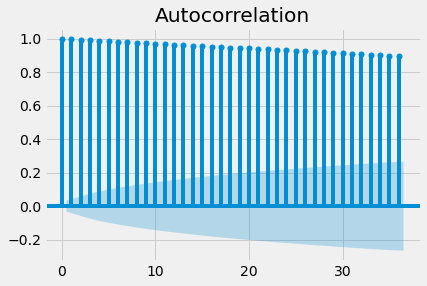

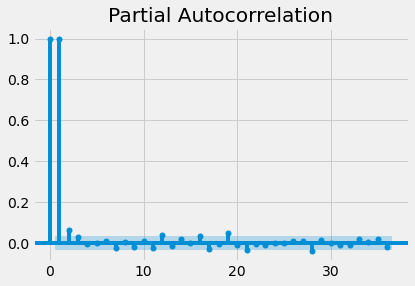

In [145]:
### ARIMA 모델의 p,d,q 확인하기

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_energy)
plot_pacf(df_energy)
plt.show()

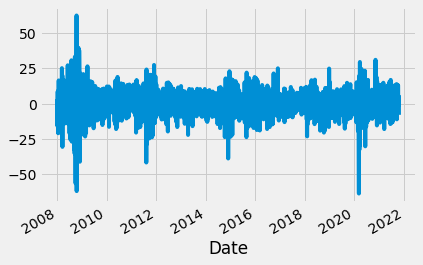

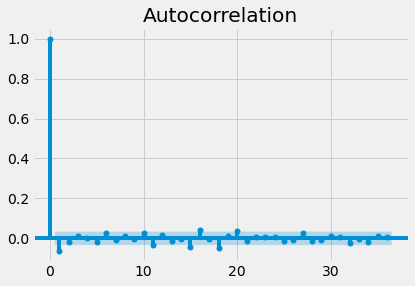

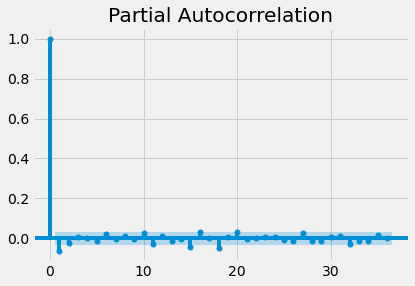

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=df_energy.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [147]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_energy, order=(0,1,2))
model_fit = model.fit(trend='c',full_output=True, disp=100)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 3480
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -12213.277
Method:                       css-mle   S.D. of innovations              8.090
Date:                Wed, 10 Nov 2021   AIC                          24434.553
Time:                        15:40:26   BIC                          24459.172
Sample:                             1   HQIC                         24443.342
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0490      0.126     -0.388      0.698      -0.297       0.198
ma.L1.D.Price    -0.0628      0.017     -3.704      0.000      -0.096      -0.030
ma.L2.D.Price    -0.0163      0.017     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test ME: 5.310


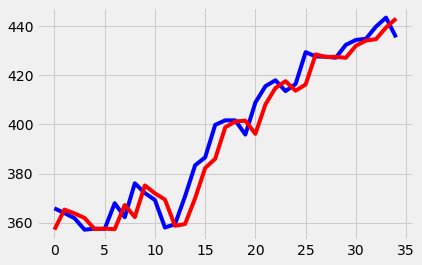

In [148]:
import matplotlib.pyplot as plt

### ARIMA 모형으로 TRAIN과 PREDICTION 시각화.

X = df_energy.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
me = 0
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
    me += abs(yhat - obs)
# evaluate forecasts
me =  me/len(test)
print('Test ME: %.3f' % me)
# plot forecasts against actual outcomes
plt.plot(test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()

In [149]:
# 수익률 계산
def return_cal(x,y):
    buy = 0
    n = 0
    for t in range(len(x)-1):
        today = x[t]
        predict = y[t+1]
        if predict > today:
            n+=1
            buy += today
        final_price = x[t]

    aver_purch = buy/n
    r_rate = ((final_price - aver_purch)/aver_purch)*100
    actual_return = (final_price-y[0])/(y[0])*100
    exceed = r_rate - actual_return
    print(aver_purch, final_price,n)
    print('최종 수익률: %.3f \n시장 수익률: %.3f \n추가 수익률: %.3f' % (r_rate, actual_return, exceed))

In [150]:
return_cal(ytest1,yhat1)
return_cal(ytest2,yhat2)
return_cal(ytest3,yhat3)
# 아리마 수익률 계산
return_cal(test, predictions)

[0.62035865] [0.64071429] 201
최종 수익률: 3.281 
시장 수익률: 4.701 
추가 수익률: -1.420
[0.32371845] [0.40925655] 238
최종 수익률: 26.424 
시장 수익률: -17.729 
추가 수익률: 44.152
[0.35187108] [0.46653504] 169
최종 수익률: 32.587 
시장 수익률: 134.947 
추가 수익률: -102.360
372.14500000000004 443.53 8
최종 수익률: 19.182 
시장 수익률: 24.193 
추가 수익률: -5.011


In [151]:
# 3분할을 다른 방법으로 접근해야 할듯 (시간 구간 별로 다시 계산)